# Agricultural Waste: 


## Reducing agricultural waste and the initiative to develop repurposed byproducts  

DIGHUM101 Isabella Jimenez

In [ ]:
# !pip install pandas
import pandas as pd 

# !pip install matplotlib
import matplotlib.pyplot as plt

# !pip install nltk
from nltk.tokenize import word_tokenize

### Background: 


Agricultural waste comes from the unwanted or leftover material from any type of crop, organic matter, water runoff, animal production etc. that comes from any agricultural operation. The excess from agricultural waste damages the environment in our landfills or through pollution. In my research I am showcasing two data sources: one, from the EPA (Environmental Protection Agency) and their insight on the increase of wasted food from 2018 and their projections of for the following years, while through its Sustainable Management of Food efforts, EPA is identifying ways to reduce wasted food and thereby limit its negative environmental consequences. My second data source implements another view on agricultural waste as it demonstrates that the agricultural sector generates a significant amount of waste,and through the the promising relevance of agro-residues in the agri-food-pharma sectors, development of bioactives and bioproducts it can be can be produced through valorization techniques. 

### Hypothesis Question: 
How do the different data sources showcase what information is being heavily weighed on the importance in agricultural waste?

### Data Source 1:

Text: 2018 Wasted Food Report 

Authroed and Published: Office of Resource Conservation and Recovery

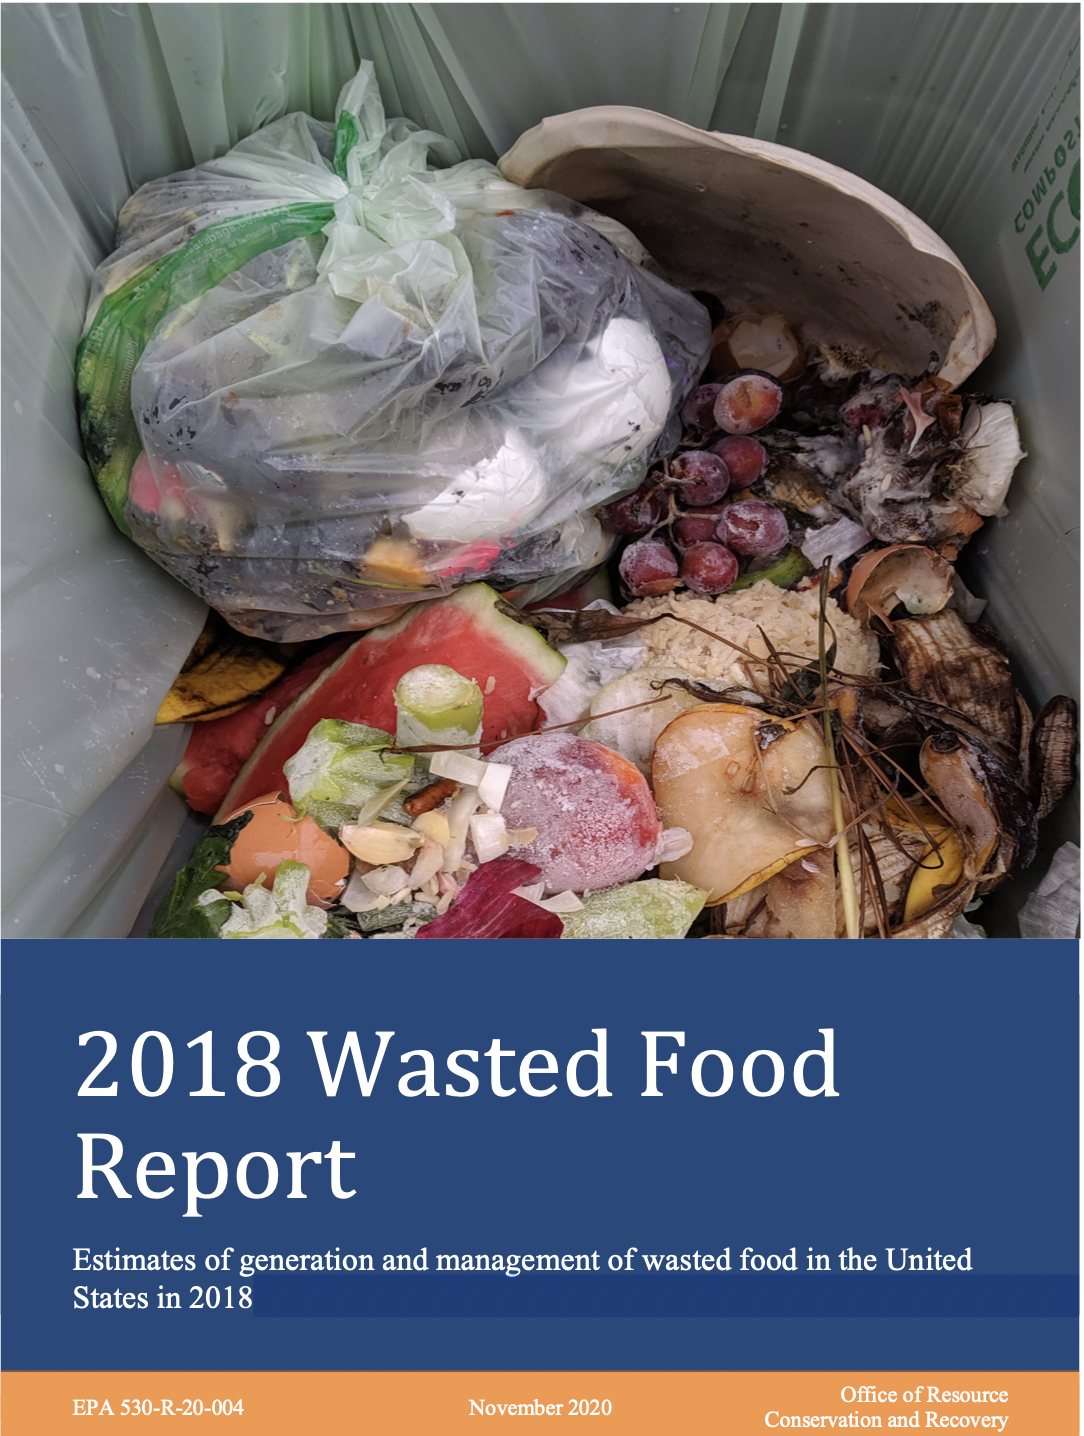

In [ ]:
ag = open("test_source.txt", encoding = "ISO-8859-1").read()
print(ag)

## Removing Punctuations

In [ ]:
from string import punctuation 
print(punctuation)

#Removing all basic punctuation
for char in punctuation:
    ag = ag.replace(char, "")

#Removing additional punctuation issues
fil = 'â¢ '

for f in fil:
    ag = ag.replace(fil, "")
    
    
ag = ag.replace("â", " ")
print(ag)


#Additional filtering was required there was an unknown character so I added a space to still allow for a word count 

In [ ]:
#Make all lowercase
ag_lower = ag.lower()
print(ag_lower)

# Tokenizing  

In [ ]:
import nltk
nltk.download('punkt')

ag_token = word_tokenize(ag_lower)
ag_token

In [ ]:
# How many words?

print(len(ag_token))

In [ ]:
# ag_token is lowercase and in list. 

# arrange alphabetically.

ag_token.sort()

# count frequencies 
from collections import Counter
ag_freq = Counter(ag_token)
ag_freq

In [ ]:
# names of different sectors that contribute to food waste  

i_count = ag_freq['industrial']
c_count = ag_freq['commercial']
r_count = ag_freq['residential']
ins_count = ag_freq['institutional']

print(i_count, c_count, r_count, ins_count)

### Frequency Count of Common Words in the EPA Document

Count of 'Industrial': 67

Count of 'Commercial': 28

Count of 'Residential': 37

Count of 'Institutional': 25




### Removing stopwords

In [ ]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")

In [ ]:
# removing stop words from ag_token 
from nltk.corpus import stopwords

In [ ]:
ag_nostop = [word for word in ag_token if word not in stopwords.words('english')]
ag_nostop 

In [ ]:
# remove the strings that are just numbers because not needed.

ag_nonumbers = [item for item in ag_nostop if not item.isdigit()]
ag_nonumbers

In [ ]:
from collections import Counter
ag_nonumfreq = Counter(ag_nonumbers)
ag_nonumfreq

In [ ]:
# top 70 most frequent words (this is when the word cooperation shows up)


ag_nonumfreq.most_common(70)

In [ ]:
# turning frequency list into dataframe

ag_df = pd.DataFrame(ag_nonumfreq.most_common(30),
                        columns = ["Word", "Frequency"])
ag_df

In [ ]:
ag_barplot = ag_df.plot.barh(x='Word', y='Frequency', 
                                  rot=0,
                                     color = "lightblue",
                                  title = "Ag Word Frequencies",
                                  figsize = (11,8));
plt.xlabel("Frequency");
plt.ylabel("Word");

### Data Source 2:

Text:Transformation of Agro-Waste into Value-Added Bioproducts and Bioactive Compounds: Micro/Nano Formulations and Application in the Agri-Food-Pharma Sector

Author: Bala, S.; Garg, D.; Sridhar, K.; Inbaraj, B.S.; Singh, R.; Kamma, S.; Tripathi, M.; Sharma, M. Transformation of Agro-Waste into Value-Added Bioproducts and Bioactive Compounds: Micro/Nano Formulations and Application in the Agri-Food-Pharma Sector. Bioengineering 2023, 10, 152. https://doi.org/10.3390/ bioengineering10020152

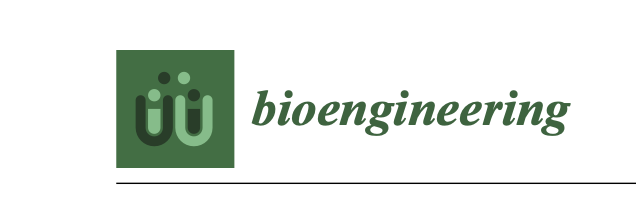

In [ ]:
ag_waste = open("test_source2.txt", encoding = "utf-8").read()
print(ag_waste) 

In [ ]:
# Removing punctuations

# Replaced punctuation with a space to get hyphenated words (value added, micro nano, etc)
for char in punctuation:
    ag_waste = ag_waste.replace(char, "")
    
print(ag_waste)

In [ ]:
#Lowercase all the letters before tokenization
ag_waste_lower = ag_waste.lower()
ag_waste_lower

In [ ]:
#Noticed a /n in the output - replace with empty char

ag_waste_lower = ag_waste_lower.replace("\n", "")
ag_waste_lower

In [ ]:
#Tokenize Words

ag_waste_token = word_tokenize(ag_waste_lower)
ag_waste_token

In [ ]:
# How many words?

print(len(ag_waste_token))

In [ ]:
# arrange alphabetically.

ag_waste_token.sort()

# count frequencies 
from collections import Counter
ag_waste_freq = Counter(ag_waste_token)
ag_waste_freq

In [ ]:
print(ag_waste_freq['biological'])
print(ag_waste_freq['chemical'])
print(ag_waste_freq['physical'])


#### Frequencies of treatments that break down the complexity of agro-waste:

biological = 5

chemical = 9

physical = 6

In [ ]:
#removing stop words in ag_waste_

ag_waste_nostop = [word for word in ag_waste_token if word not in stopwords.words('english')]
ag_waste_nostop 

In [ ]:
# remove the strings that are just numbers because not needed.

ag_waste_nonumbers = [item for item in ag_waste_nostop if not item.isdigit()]
ag_waste_nonumbers

In [ ]:
# do frequency count of Ag Waste with no numbers and stopwords 

ag_waste_nonumfreq = Counter(ag_waste_nonumbers)
ag_waste_nonumfreq

In [ ]:
# How many words are left without stopwords, no strings with numbers, and unique? 

print(len(ag_waste_nonumfreq))



In [ ]:
# most frequently used words 
ag_waste_mostcom50 = ag_waste_nonumfreq.most_common(50)
ag_waste_mostcom50


# removing weird characters that are not recognized as punctuations and URLs
ag_waste_mostcom50.remove(('j', 36))
ag_waste_mostcom50.remove(('r', 21))
ag_waste_mostcom50.remove(('e', 14))
ag_waste_mostcom50.remove(('c', 15))
ag_waste_mostcom50.remove(('al', 13))
ag_waste_mostcom50.remove(('b', 15))
ag_waste_mostcom50.remove(('agrouc0u8208', 14))

ag_waste_mostcom50



In [ ]:
# turning frequency list into dataframe

ag_waste_df = pd.DataFrame(ag_waste_mostcom50,
                        columns = ["Word", "Frequency"])
ag_waste_df

In [ ]:
ag_waste_barplot = ag_waste_df.plot.barh(x='Word', y='Frequency', 
                                  rot=0,
                                     color = "red",
                                  title = "Ag Waste Word Frequencies",
                                  figsize = (14,11));
plt.xlabel("Frequency");
plt.ylabel("Word");

### Future Research?

It would be insightful to explore other areas that demonstrate the ways in which agriultural waste can be approached with new applications. By not only using bioproudcts, but also in figuring out the possibilities of what it takes to improve not just our environment but also our health as a society. As these two resources where the only ones that I hand picked, it barely touches on the length of technical and valuable information to better understand the projections of where our agricultural waste has been in the past and what that says to where we will be in the near future.   


### Sources 

https://www.epa.gov/sites/default/files/2020-11/documents/2018_wasted_food_report-11-9-20_final_.pdf


https://www.sciencedirect.com/topics/earth-and-planetary-sciences/agricultural-waste

Bioengineering 2023, 10, 152. https://doi.org/10.3390/bioengineering10020152 https://www.mdpi.com/journal/bioengineering